In [1]:
import numpy as np
import pandas as pd


Loading the data


In [2]:
data = pd.ExcelFile("D:\KPMG_VI_New_raw_data_update_final.xlsx")

Reading the Transactions, Demographic and Address related information in seperate files

In [3]:
Transactions = pd.read_excel(data,'Transactions')
CustomerDemo = pd.read_excel(data,'CustomerDemographic')
CustomerAdd = pd.read_excel(data,'CustomerAddress')

Process the transactions data


In [4]:
Transactions.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


The code Transactions.columns = Transactions.iloc[0] will set the column names of the DataFrame Transactions to the values in the first row of the DataFrame.

In [5]:
Transactions.columns = Transactions.iloc[0]

In [6]:
# drop the zeroth row
Transactions.drop(0,axis = 0, inplace = True)

In [7]:
Transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24 00:00:00,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.4,37823
19997,19997,41,127,2017-11-09 00:00:00,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560
19998,19998,87,2284,2017-04-14 00:00:00,True,Approved,OHM Cycles,Standard,medium,medium,1636.9,44.71,40410
19999,19999,6,2764,2017-07-03 00:00:00,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216


In [8]:
Transactions.shape

(20000, 13)

In [9]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   transaction_id           20000 non-null  object
 1   product_id               20000 non-null  object
 2   customer_id              20000 non-null  object
 3   transaction_date         20000 non-null  object
 4   online_order             19640 non-null  object
 5   order_status             20000 non-null  object
 6   brand                    19803 non-null  object
 7   product_line             19803 non-null  object
 8   product_class            19803 non-null  object
 9   product_size             19803 non-null  object
 10  list_price               20000 non-null  object
 11  standard_cost            19803 non-null  object
 12  product_first_sold_date  19803 non-null  object
dtypes: object(13)
memory usage: 2.0+ MB


In [10]:
Transactions.describe()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000,20000,20000,20000,19640,20000,19803,19803,19803,19803,20000.00,19803.00,19803
unique,20000,101,3494,364,2,2,6,4,3,3,296.00,103.00,100
top,1,0,2183,2017-02-14 00:00:00,True,Approved,Solex,Standard,medium,medium,2091.47,388.92,33879
freq,1,1378,14,82,9829,19821,4253,14176,13826,12990,465.00,465.00,234


In [11]:
#checking null values
Transactions.isna().sum()

0
transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [12]:
#filling the null values with appropriate entries
Transactions["online_order"].fillna("na",inplace = True)
Transactions["brand"].fillna("not known",inplace = True)
Transactions["product_line"].fillna("not known",inplace = True)
Transactions["product_class"].fillna("not known",inplace = True)
Transactions["product_size"].fillna("not known",inplace = True)
Transactions["standard_cost"].fillna(Transactions["standard_cost"].mean(),inplace = True)
Transactions["product_first_sold_date"].fillna("0",inplace = True)


In [13]:
Transactions.isnull().sum()

0
transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [14]:
# changing the data type
Transactions = Transactions.astype({"transaction_id":"int64",
                                    "product_id":"int64",
                                    "customer_id":"int64",
                                    "list_price":"int64",
                                    "standard_cost":"int64"})

In [15]:
Transactions['transaction_date'] = pd.to_datetime(Transactions['transaction_date'])

In [16]:
Transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71,53,41245
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091,388,41701
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793,248,36361
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198,381,36145
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765,709,42226
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005,1203,37823
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416,312,35560
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636,44,40410
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227,136,38216


In [17]:
Transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 1 to 20000
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             20000 non-null  object        
 5   order_status             20000 non-null  object        
 6   brand                    20000 non-null  object        
 7   product_line             20000 non-null  object        
 8   product_class            20000 non-null  object        
 9   product_size             20000 non-null  object        
 10  list_price               20000 non-null  int64         
 11  standard_cost            20000 non-null  int64         
 12  product_first_sold_date  20000 n

In [18]:
Transactions.nunique()

0
transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   3
order_status                   2
brand                          7
product_line                   5
product_class                  4
product_size                   4
list_price                   274
standard_cost                 97
product_first_sold_date      101
dtype: int64

In [19]:
Transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object', name=0)

In [20]:
Transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
not known          197
Name: brand, dtype: int64

In [21]:
Transactions['order_status'].value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [22]:
Transactions['product_line'].value_counts()

Standard     14176
Road          3970
Touring       1234
Mountain       423
not known      197
Name: product_line, dtype: int64

In [23]:
Transactions['product_class'].value_counts()

medium       13826
high          3013
low           2964
not known      197
Name: product_class, dtype: int64

In [24]:
Transactions['online_order'].value_counts()

True     9829
False    9811
na        360
Name: online_order, dtype: int64

In [25]:
Transactions['product_first_sold_date'].value_counts()

33879    234
41064    229
37823    227
39880    222
38216    220
        ... 
41848    169
42404    168
41922    166
37659    163
34586    162
Name: product_first_sold_date, Length: 101, dtype: int64

In [26]:
Transactions["profit"] = Transactions["list_price"] - Transactions["standard_cost"]
Transactions["profit_%"] = (Transactions['list_price']-Transactions["standard_cost"])/Transactions["standard_cost"] * 100

In [27]:
Transactions

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,profit_%
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71,53,41245,18,33.962264
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091,388,41701,1703,438.917526
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793,248,36361,1545,622.983871
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198,381,36145,817,214.435696
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765,709,42226,1056,148.942172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19996,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005,1203,37823,802,66.666667
19997,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416,312,35560,104,33.333333
19998,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636,44,40410,1592,3618.181818
19999,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227,136,38216,91,66.911765


Now we do the same data processing for the Customer Demographic data

In [28]:
cd = pd.read_excel(data,"CustomerDemographic")

In [29]:
cd.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7


In [30]:
cd.columns = cd.iloc[0]

In [31]:
cd.drop(0,axis = 0, inplace = True)

In [32]:
cd

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15
4,4,Talbot,NaN,Male,33,1961-10-03 00:00:00,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3996,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,-100,No,19
3997,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1
3998,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3999,3999,Patrizius,NaN,Male,11,1973-10-24 00:00:00,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10


In [33]:
cd.shape

(4000, 13)

In [34]:
cd.duplicated().sum()

0

In [35]:
cd.describe()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
count,4000,4000,3875,4000,4000,3913,3494,3344,4000,4000,3698,4000,3913
unique,4000,3139,3725,6,100,3448,195,9,3,2,90,2,22
top,1,Max,Pristnor,Female,16,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100,Yes,7
freq,1,5,3,2037,56,7,45,799,2000,3998,113,2024,235


In [36]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            3875 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            3494 non-null   object
 7   job_industry_category                3344 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  default                              3698 non-null   object
 11  owns_car                             4000 n

In [37]:
cd.nunique()

0
customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
dtype: int64

In [38]:
cd.isnull().sum()

0
customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [39]:
cd["last_name"].fillna("not_known",inplace = True)
cd["job_title"].fillna("not_known",inplace = True)
cd["job_industry_category"].fillna("not_known",inplace = True)
cd["tenure"].fillna(int(0),inplace = True)

In [40]:
cd.isnull().sum()

0
customer_id                              0
first_name                               0
last_name                                0
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                   0
dtype: int64

In [41]:
cd.drop("default",axis = 1,inplace = True)

In [42]:
cd

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12 00:00:00,Executive Secretary,Health,Mass Customer,N,Yes,11
2,2,Eli,Bockman,Male,81,1980-12-16 00:00:00,Administrative Officer,Financial Services,Mass Customer,N,Yes,16
3,3,Arlin,Dearle,Male,61,1954-01-20 00:00:00,Recruiting Manager,Property,Mass Customer,N,Yes,15
4,4,Talbot,not_known,Male,33,1961-10-03 00:00:00,not_known,IT,Mass Customer,N,No,7
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13 00:00:00,Senior Editor,not_known,Affluent Customer,N,Yes,8
...,...,...,...,...,...,...,...,...,...,...,...,...
3996,3996,Rosalia,Halgarth,Female,8,1975-08-09 00:00:00,VP Product Management,Health,Mass Customer,N,No,19
3997,3997,Blanch,Nisuis,Female,87,2001-07-13 00:00:00,Statistician II,Manufacturing,High Net Worth,N,Yes,1
3998,3998,Sarene,Woolley,U,60,NaN,Assistant Manager,IT,High Net Worth,N,No,0
3999,3999,Patrizius,not_known,Male,11,1973-10-24 00:00:00,not_known,Manufacturing,Affluent Customer,N,Yes,10


In [43]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   customer_id                          4000 non-null   object
 1   first_name                           4000 non-null   object
 2   last_name                            4000 non-null   object
 3   gender                               4000 non-null   object
 4   past_3_years_bike_related_purchases  4000 non-null   object
 5   DOB                                  3913 non-null   object
 6   job_title                            4000 non-null   object
 7   job_industry_category                4000 non-null   object
 8   wealth_segment                       4000 non-null   object
 9   deceased_indicator                   4000 non-null   object
 10  owns_car                             4000 non-null   object
 11  tenure                               4000 n

In [44]:
cd['DOB'] = pd.to_datetime(cd['DOB'])

In [45]:
cd = cd.astype({'past_3_years_bike_related_purchases':'int64',
                'tenure':'float64',
                'customer_id':'int64'})

In [46]:
cd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 1 to 4000
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            4000 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [47]:
cd.isnull().sum()

0
customer_id                             0
first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    87
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
dtype: int64

In [48]:
cd.dropna(inplace = True)

In [49]:
cd

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
1,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
2,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
3,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
4,4,Talbot,not_known,Male,33,1961-10-03,not_known,IT,Mass Customer,N,No,7.0
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,not_known,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0
3996,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0
3997,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3999,3999,Patrizius,not_known,Male,11,1973-10-24,not_known,Manufacturing,Affluent Customer,N,Yes,10.0


In [50]:
cd.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object', name=0)

In [51]:
cd['gender'].value_counts()

Female    2037
Male      1872
F            1
U            1
Femal        1
M            1
Name: gender, dtype: int64

In [52]:
# dropping the rows in which the gender value is not valid
cd.drop(cd.index[(cd['gender'] == "F")],axis = 0,inplace = True)
cd.drop(cd.index[(cd['gender'] == "Femal")],axis = 0,inplace = True)
cd.drop(cd.index[(cd['gender'] == "M")],axis = 0,inplace = True)


In [53]:
cd['gender']

2         Male
3         Male
4         Male
5       Female
6         Male
         ...  
3995      Male
3996    Female
3997    Female
3999      Male
4000      Male
Name: gender, Length: 3910, dtype: object

In [54]:
cd['gender'].value_counts()

Female    2037
Male      1872
U            1
Name: gender, dtype: int64

In [55]:
cd['gender'] = cd['gender'].str.replace("U","Others")

In [56]:
cd['gender'].value_counts()

Female    2037
Male      1872
Others       1
Name: gender, dtype: int64

In [57]:
cd['job_title'].value_counts()

not_known                               497
Tax Accountant                           43
Business Systems Development Analyst     43
Social Worker                            42
Recruiting Manager                       41
                                       ... 
Database Administrator I                  4
Health Coach I                            3
Health Coach III                          3
Research Assistant III                    3
Developer I                               1
Name: job_title, Length: 196, dtype: int64

In [58]:
cd['job_industry_category'].value_counts()

Manufacturing         796
Financial Services    767
not_known             655
Health                595
Retail                358
Property              266
IT                    152
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [59]:
cd['wealth_segment'].value_counts()

Mass Customer        1951
High Net Worth        996
Affluent Customer     963
Name: wealth_segment, dtype: int64

In [60]:
cd['deceased_indicator'].value_counts()

N    3908
Y       2
Name: deceased_indicator, dtype: int64

In [61]:
cd['owns_car'].value_counts()

Yes    1971
No     1939
Name: owns_car, dtype: int64

In [62]:
cd['tenure'].value_counts()

7.0     235
5.0     228
11.0    220
10.0    218
16.0    215
8.0     211
18.0    207
12.0    202
9.0     200
14.0    200
6.0     192
4.0     191
13.0    190
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

In [63]:
from datetime import datetime,date as dt
cd["year"]=cd["DOB"].dt.year
today=dt.today()
cd.astype({"year":"int64"})
cd["age"]=today.year-cd["year"]
cd.drop("year",axis=1,inplace=True)

In [64]:
cd

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
2,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,43
3,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,69
4,4,Talbot,not_known,Male,33,1961-10-03,not_known,IT,Mass Customer,N,No,7.0,62
5,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,not_known,Affluent Customer,N,Yes,8.0,46
6,6,Curr,Duckhouse,Male,35,1966-09-16,not_known,Retail,High Net Worth,N,Yes,13.0,57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0,48
3996,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,48
3997,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,22
3999,3999,Patrizius,not_known,Male,11,1973-10-24,not_known,Manufacturing,Affluent Customer,N,Yes,10.0,50


Now doing the same process for the Customer Address data too

In [65]:
CustomerAdd

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
...,...,...,...,...,...,...
3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3998,4002,8194 Lien Street,4032,QLD,Australia,7


In [66]:
ca = CustomerAdd

In [67]:
ca.columns = ca.iloc[0]

In [68]:
ca.drop(0,axis=0,inplace =True)

In [69]:
ca.head()

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,New South Wales,Australia,10
2,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,New South Wales,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9


In [70]:
ca.nunique()

0
customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [71]:
ca.duplicated().sum()

0

In [72]:
ca.describe()

,customer_id,address,postcode,state,country,property_valuation
count,3999,3999,3999,3999,3999,3999
unique,3999,3996,873,5,1,12
top,1,3 Mariners Cove Terrace,2170,NSW,Australia,9
freq,1,2,31,2054,3999,647


In [73]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   object
 1   address             3999 non-null   object
 2   postcode            3999 non-null   object
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   object
dtypes: object(6)
memory usage: 187.6+ KB


In [74]:
ca.isnull().sum()

0
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [75]:
ca.isna().sum()

0
customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

Changing the data type

In [76]:
ca=ca.astype({"customer_id":"int64","postcode":"int64","property_valuation":"int64"})

In [77]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 1 to 3999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


Exploring the columns

In [78]:
ca.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object', name=0)

In [79]:
ca['address'].value_counts()

3 Mariners Cove Terrace      2
3 Talisman Place             2
64 Macpherson Junction       2
359 Briar Crest Road         1
4543 Service Terrace         1
                            ..
5063 Shopko Pass             1
09 Hagan Pass                1
87897 Lighthouse Bay Pass    1
294 Lawn Junction            1
320 Acker Drive              1
Name: address, Length: 3996, dtype: int64

In [80]:
ca['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

Changing the names "Victoria" to "VIC" and "New South Wales" to "NSW"

In [82]:
ca['state'].replace('New South Wales', 'NSW', inplace=True)
ca['state'].replace('Victoria', 'VIC', inplace=True)
ca.dropna(inplace=True)
ca

,customer_id,address,postcode,state,country,property_valuation
1,1,060 Morning Avenue,2016,NSW,Australia,10
2,2,6 Meadow Vale Court,2153,NSW,Australia,10
3,4,0 Holy Cross Court,4211,QLD,Australia,9
4,5,17979 Del Mar Point,2448,NSW,Australia,4
5,6,9 Oakridge Court,3216,VIC,Australia,9
...,...,...,...,...,...,...
3995,3999,1482 Hauk Trail,3064,VIC,Australia,3
3996,4000,57042 Village Green Point,4511,QLD,Australia,6
3997,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3998,4002,8194 Lien Street,4032,QLD,Australia,7


In [83]:
ca['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

All the columns have correct information

Now doing data preprocessing on the new dataset

In [85]:
ncl=pd.read_excel(data,"NewCustomerList")

In [86]:
ncl

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.875000,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.112500,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.010000,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.087500,1.087500,4.0,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.79,0.7900,0.790000,0.790000,996.0,996,0.374
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.76,0.7600,0.950000,0.807500,997.0,997,0.357
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.85,1.0625,1.062500,1.062500,997.0,997,0.357
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,1.09,1.3625,1.362500,1.158125,997.0,997,0.357


In [87]:
ncl.columns=Ncl.iloc[0]

In [88]:
ncl.drop(0,axis=0,inplace=True)

In [89]:
ncl.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,NaN,NaN,NaN,NaN,NaN,Rank,Value
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1.0,1,1.71875
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1.0,1,1.71875
3,Ardelis,Forrester,Female,10,1974-08-28 00:00:00,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1.0,1,1.71875
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4.0,4,1.703125
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4.0,4,1.703125


Dropping unknown columns

In [90]:
ncl.drop(ncl.columns[[16,17,18,19,20]],axis = 1,inplace=True)

In [91]:
ncl.shape

(1000, 18)

In [92]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   first_name                           1000 non-null   object
 1   last_name                            971 non-null    object
 2   gender                               1000 non-null   object
 3   past_3_years_bike_related_purchases  1000 non-null   object
 4   DOB                                  983 non-null    object
 5   job_title                            894 non-null    object
 6   job_industry_category                835 non-null    object
 7   wealth_segment                       1000 non-null   object
 8   deceased_indicator                   1000 non-null   object
 9   owns_car                             1000 non-null   object
 10  tenure                               1000 non-null   object
 11  address                              1000 n

In [93]:
ncl.describe().T

,count,unique,top,freq
0,,,,
first_name,1000,940,Rozamond,3
last_name,971,961,Sissel,2
gender,1000,3,Female,513
past_3_years_bike_related_purchases,1000,100,60,20
DOB,983,961,1965-07-03,2
job_title,894,184,Associate Professor,15
job_industry_category,835,9,Financial Services,203
wealth_segment,1000,3,Mass Customer,508
deceased_indicator,1000,1,N,1000


In [94]:
ncl.nunique()

0
first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     961
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       16
Rank                                    324
Value                                   324
dtype: int64

In [95]:
ncl.isnull().sum()

0
first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [96]:
ncl["last_name"].fillna("Not known",inplace=True)
ncl["job_title"].fillna("Not known",inplace=True)
ncl["job_industry_category"].fillna("Not known",inplace=True)

In [97]:
ncl.isnull().sum()

0
first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    17
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
Rank                                    0
Value                                   0
dtype: int64

In [99]:
ncl['DOB']= pd.to_datetime(ncl["DOB"])
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            1000 non-null   object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   object        
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            1000 non-null   object        
 6   job_industry_category                1000 non-null   object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure      

In [100]:
ncl=ncl.astype({"past_3_years_bike_related_purchases":"int64",
 "tenure":"int64",
 "postcode":"int64",
 "property_valuation":"int64",
 "Value":"float64" ,
 "Rank":"int64",})


In [101]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 1 to 1000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            1000 non-null   object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            1000 non-null   object        
 6   job_industry_category                1000 non-null   object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure      

In [102]:
ncl.duplicated().sum()

0

In [103]:
ncl.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object', name=0)

In [104]:
ncl['gender'].value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

In [105]:
ncl['gender'] = ncl['gender'].str.replace("U","others")

In [106]:
ncl['gender'].value_counts()

Female    513
Male      470
others     17
Name: gender, dtype: int64

In [107]:
ncl.dropna(inplace=True)

In [108]:
from datetime import datetime,date as dt
ncl['Year'] = ncl['DOB'].dt.year
today=dt.today()
today.year

2023

In [110]:
ncl.astype({"Year":"int64"})
ncl["age"]=today.year-ncl["Year"]

In [111]:
ncl

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,Year,age
1,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,1957,66
2,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,1970,53
3,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,1974,49
4,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,1979,44
5,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,1965,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9,2 Sloan Way,2200,NSW,Australia,7,996,0.374000,1959,64
997,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6,04 Union Crossing,2196,NSW,Australia,10,997,0.357000,2001,22
998,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15,33475 Fair Oaks Junction,4702,QLD,Australia,2,997,0.357000,1954,69
999,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19,57666 Victoria Way,4215,QLD,Australia,2,997,0.357000,1952,71


Comparing the old and new Customers data

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns

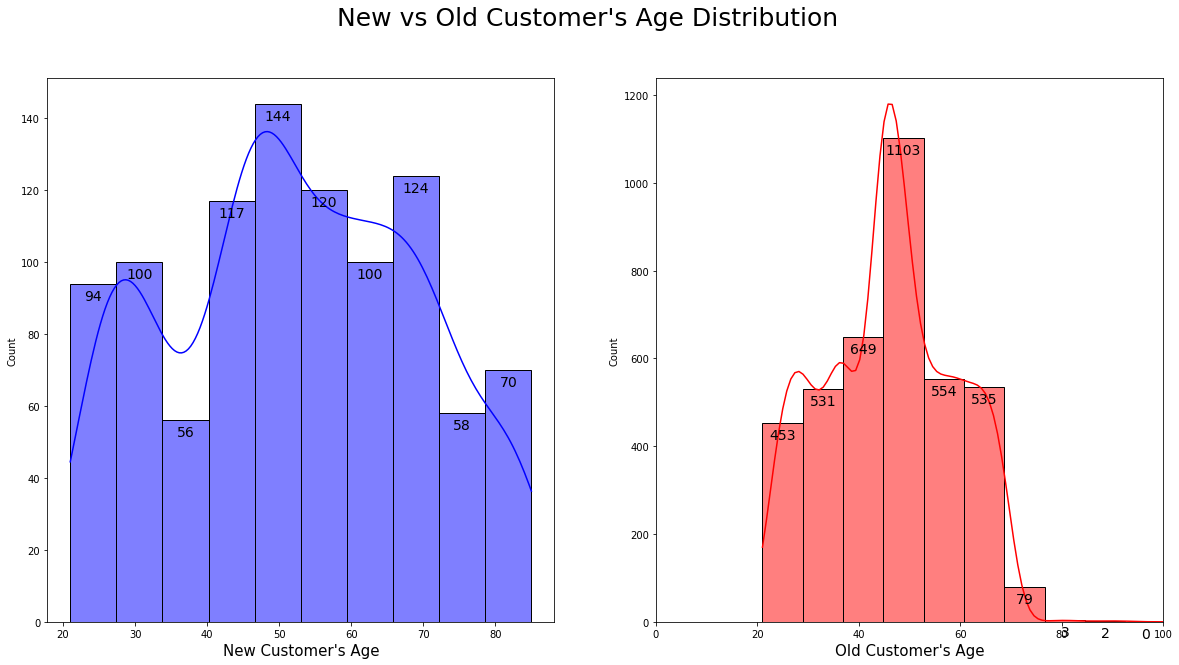

In [113]:
plt.figure(figsize=(20,10))
plt.subplot(121)

c = sns.histplot(data=ncl,bins=10,x="age",color="blue",kde=True)

for i in c.patches:
    c.annotate(format(round(i.get_height()),'.0f'),
               (i.get_x() + i.get_width()/2., i.get_height()),
               ha = 'center', va = 'center', color = 'black',
               size = 14,
               xytext = (0,-12),
               textcoords = 'offset points')
    
plt.xlabel("New Customer's Age",fontsize=15)

plt.subplot(122)

d = sns.histplot(data=cd,bins=20,x="age",color="red",kde=True)

for i in d.patches:
    d.annotate(format(round(i.get_height()),'.0f'),
               (i.get_x() + i.get_width()/2., i.get_height()),
               ha = 'center', va = 'center', color = 'black',
               size = 14,
               xytext = (0,-12),
               textcoords = 'offset points')

plt.xlim(0,100) 
plt.xlabel("Old Customer's Age",fontsize=15)

plt.suptitle("New vs Old Customer's Age Distribution",fontsize = 25)

plt.show()


* From the above plots following conclusions can be made:

    *  In Old Customers data, the age of the most of the customers lies in the range 40-50.
    *  In New Customers data, the age of the most of the customers lies in the range
    45-55.
    *  The lowest age groups are 35-40 and 70-80 in New and Old Customers data respectively.
    *  Age group 45-55 is considered as most populated in both the data.



In [115]:
table = pd.pivot_table(data = cd, index = "gender", aggfunc = "sum").reset_index("gender")
table

,gender,age,customer_id,past_3_years_bike_related_purchases,tenure
0,Female,93693,4130807,98264,21708.0
1,Male,85843,3692409,93396,19931.0
2,Others,180,34,59,20.0


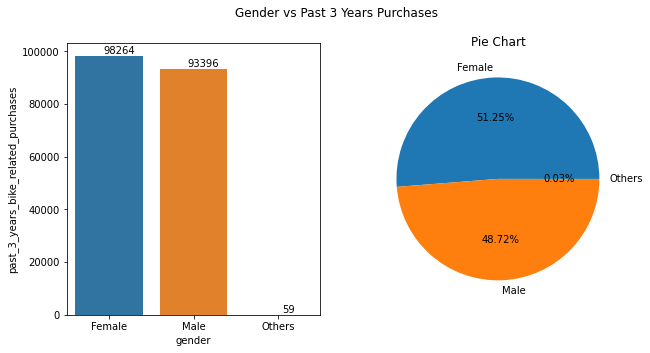

In [121]:
plt.figure(figsize = (10,5))
plt.subplot(121)

d = sns.barplot(data = table, x = "gender", y = "past_3_years_bike_related_purchases")

for i in d.patches:
    d.annotate(format(round(i.get_height()), '.0f'),
               (i.get_x() + i.get_width()/2., i.get_height()),
               ha = "center", va = "center", color = "black",
               size = 10,
               xytext = (10,5),
               textcoords = 'offset points')
    
plt.subplot(122)
plt.pie(data = table, x = "past_3_years_bike_related_purchases", autopct = '%.2f%%', labels = ["Female","Male","Others"])
plt.suptitle("Gender vs Past 3 Years Purchases")
plt.title("Pie Chart")

plt.show()



* Following conclusions are derived from the above plots:
   * The contribution of females in the purchases is slightly higher than males.

In [122]:
data=ncl["job_industry_category"].value_counts()

In [123]:
data

Financial Services    202
Manufacturing         199
Not known             165
Health                152
Retail                 78
Property               64
Entertainment          36
IT                     36
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64

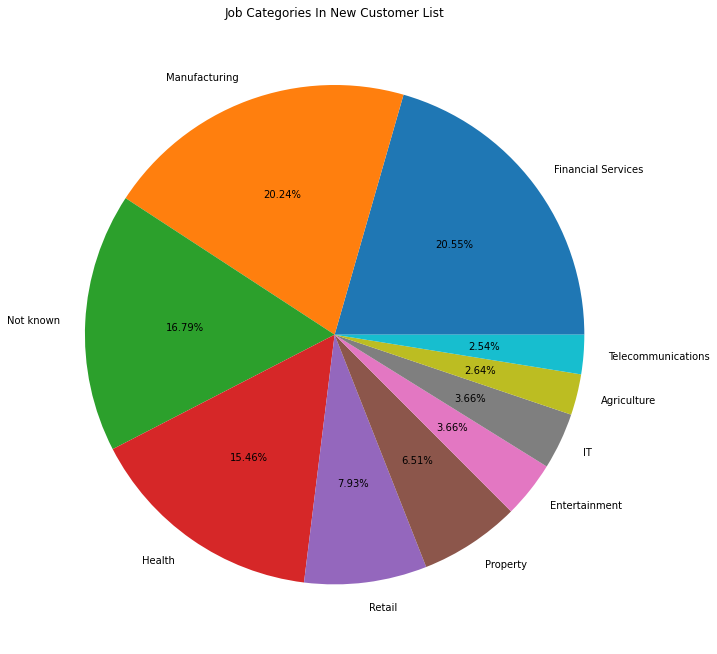

In [131]:
keys=[202,199,165,152,78,64,36,36,26,25]
plt.figure(figsize=(10,10))
plt.pie(keys,labels=["Financial Services","Manufacturing", "Not known" , "Health " , "Retail","Property","Entertainment",
                     "IT","Agriculture","Telecommunications"],autopct='%.2f%%')
plt.title("Job Categories In New Customer List")
plt.tight_layout()


* The following conclusion can be drawn from the above plots
    * Most of the customers are from Health, Manufacturing and Finance sectors.
    * Very few Customers are from IT, Telecommunications and Agriculture sectors.

In [127]:
data=cd["job_industry_category"].value_counts()
data

Manufacturing         796
Financial Services    767
not_known             655
Health                595
Retail                358
Property              266
IT                    152
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

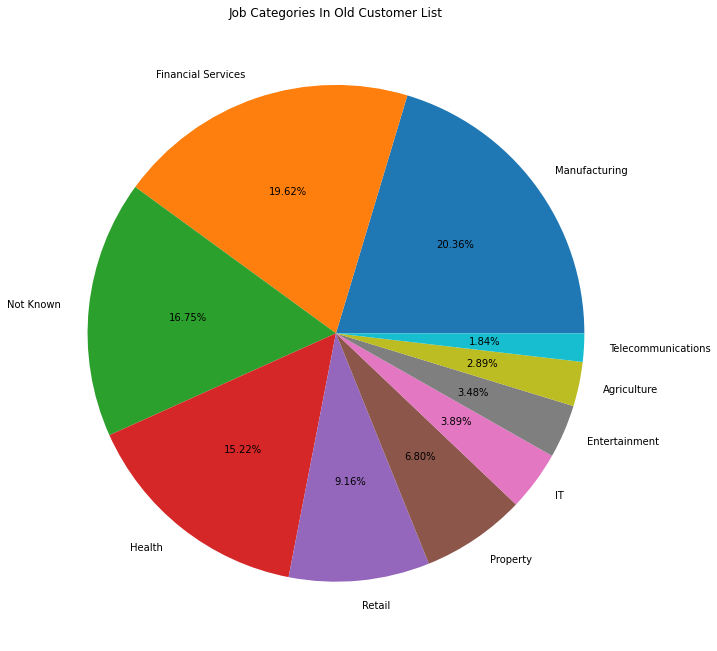

In [129]:
keys=[796,767,655,595,358,266,152,136,113,72]
labels=['Manufacturing ' ,'Financial Services ','Not Known '
 ,'Health ','Retail','Property','IT','Entertainment' ,'Agriculture',"Telecommunications"]
plt.figure(figsize=(10,10))
plt.pie(keys,labels=labels ,autopct="%.2f%%")
plt.title("Job Categories In Old Customer List")
plt.tight_layout()

* The following conclusion can be drawn from the above plots
    * Most of the customers are from Health, Manufacturing and Finance sectors.
    * Very few Customers are from IT, Telecommunications and Agriculture sectors.

In [132]:
data=ncl.groupby("wealth_segment").sum().reset_index()

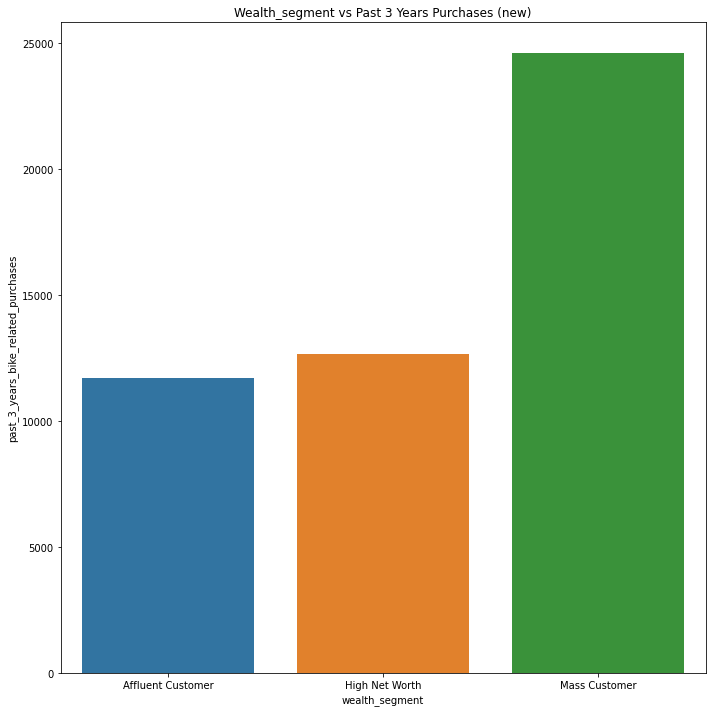

In [134]:
plt.figure(figsize=(10,10))
sns.barplot(data=data,x='wealth_segment',y='past_3_years_bike_related_purchases')
plt.title('Wealth_segment vs Past 3 Years Purchases (new)')
plt.tight_layout()

Mass Customers has the highest purchases in last 3 years

In [135]:
data=cd.groupby("wealth_segment").sum().reset_index()

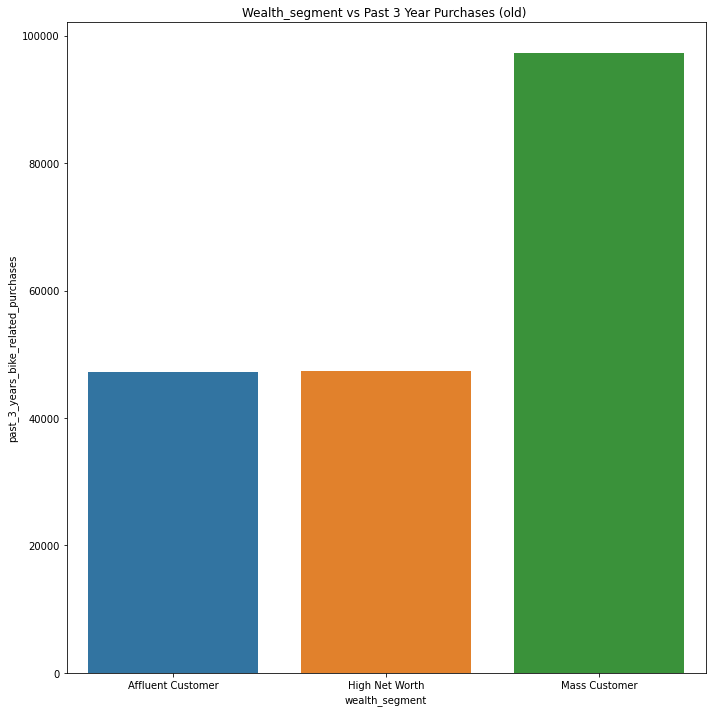

In [136]:
plt.figure(figsize=(10,10))
sns.barplot(data=data,x='wealth_segment',y='past_3_years_bike_related_purchases')
plt.title('Wealth_segment vs Past 3 Year Purchases (old) ')
plt.tight_layout()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7576\1644527754.py:3: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  c=sns.histplot(data=ncl,bins=10,x="age",hue="wealth_segment",palette=['lightyellow','green'])


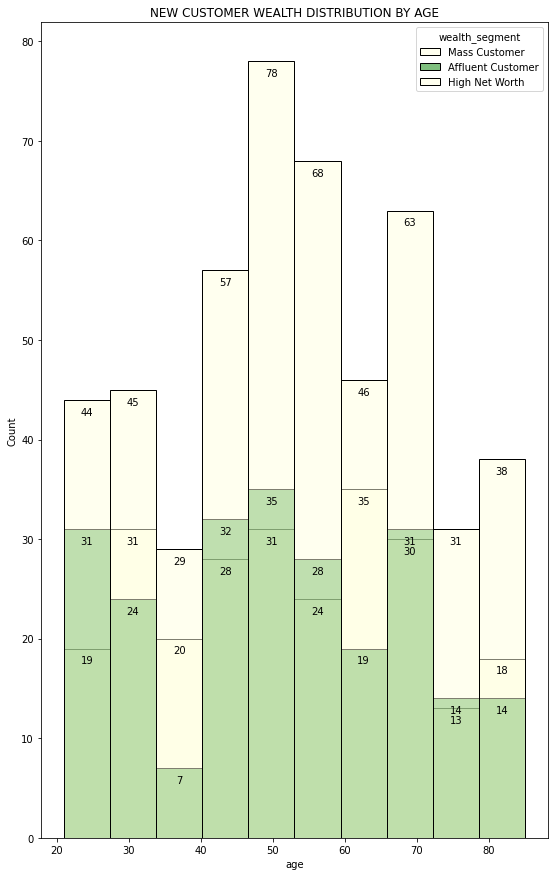

In [140]:

plt.figure(figsize=(20,15))
plt.subplot(121)
c=sns.histplot(data=ncl,bins=10,x="age",hue="wealth_segment",palette=['lightyellow','green'])
for i in c.patches:
    c.annotate(format(round(i.get_height()), '.0f'),
    (i.get_x() + i.get_width() / 2., i.get_height()),
    ha='center', va='center',color='black',
    size=10,
    xytext=(0, -12),
    textcoords='offset points')
plt.title('NEW CUSTOMER WEALTH DISTRIBUTION BY AGE')
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_7576\2283549507.py:4: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  c=sns.histplot(data=cd,bins=10,x="age",hue="wealth_segment",palette=['lightyellow','green'])


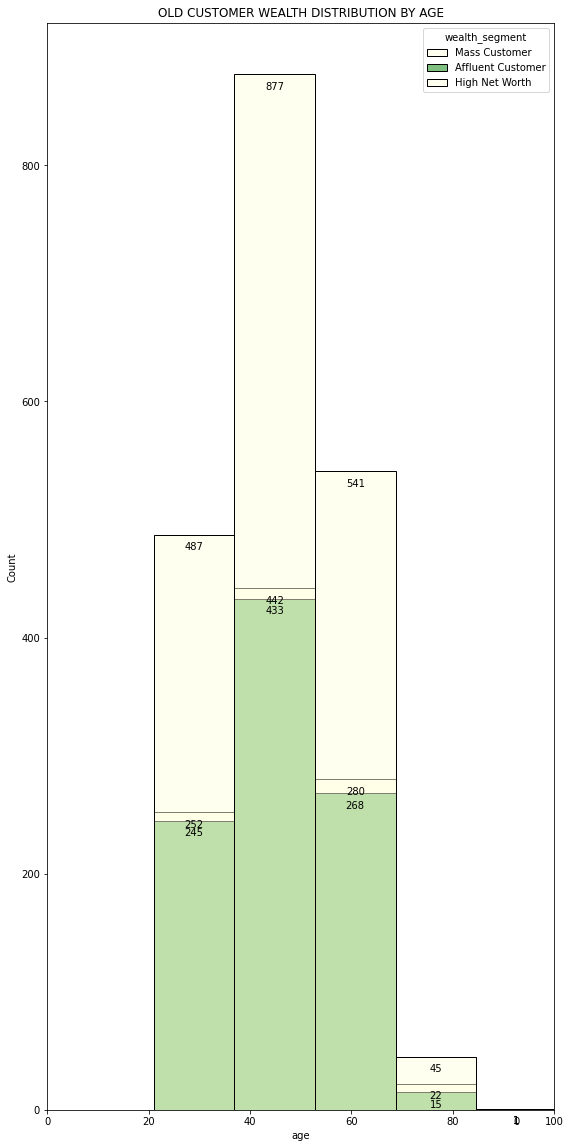

In [141]:
plt.figure(figsize=(20,20))
plt.subplot(121)
np.sqrt(cd["age"])
c=sns.histplot(data=cd,bins=10,x="age",hue="wealth_segment",palette=['lightyellow','green'])
for i in c.patches:
 c.annotate(format(round(i.get_height()), '.0f'),
 (i.get_x() + i.get_width() / 2., i.get_height()),
 ha='center', va='center',color='black',
 size=10,
 xytext=(0, -12),textcoords='offset points'
 )
plt.xlim(0,100)
plt.title("OLD CUSTOMER WEALTH DISTRIBUTION BY AGE")
plt.show()

In [143]:
data=pd.DataFrame(ncl.groupby('state')["owns_car"].value_counts())
data.rename(columns={"owns_car":"count"},inplace=True)
data.reset_index("state",inplace=True)
data.reset_index("owns_car",inplace=True)
data

,owns_car,state,count
0,No,NSW,267
1,Yes,NSW,232
2,Yes,QLD,125
3,No,QLD,101
4,No,VIC,129
5,Yes,VIC,129


In [144]:
range(6)

range(0, 6)

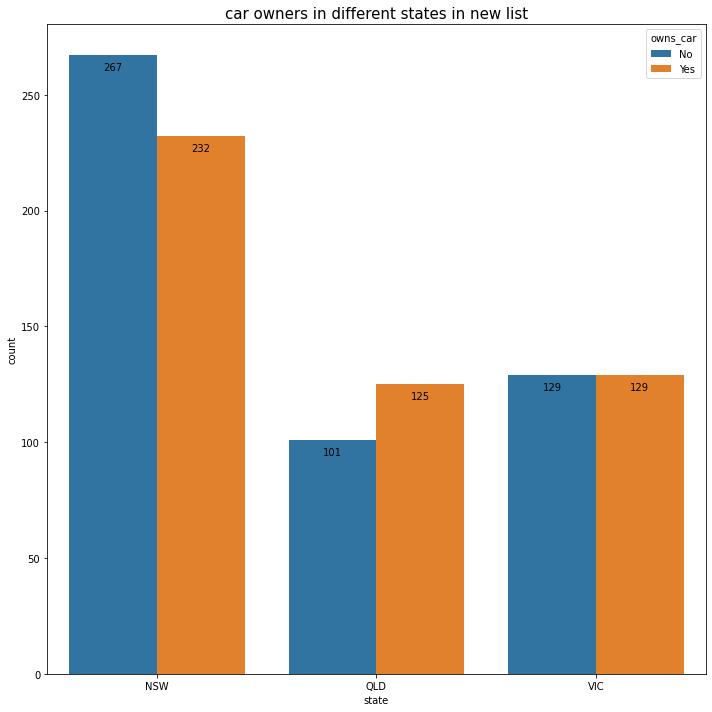

In [145]:
plt.figure(figsize=(10,10))
c=sns.barplot(data=data,x='state',y='count',hue="owns_car")
plt.title("car owners in different states in new list",fontsize=15)
for i in c.patches:
 c.annotate(format(round(i.get_height()), '.0f'),
 (i.get_x() + i.get_width() / 2., i.get_height()),
 ha='center', va='center',color='black',
 size=10,
 xytext=(0, -12),textcoords='offset points'
 )
plt.tight_layout()

In [146]:
most_recent_purchase =Transactions['transaction_date'].max()
Transactions['last_purchase_days_ago'] = most_recent_purchase -Transactions['transaction_date']
Transactions['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
Transactions.head(25)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,profit_%,last_purchase_days_ago
1,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71,53,41245,18,33.962264,308.0
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091,388,41701,1703,438.917526,223.0
3,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793,248,36361,1545,622.983871,75.0
4,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198,381,36145,817,214.435696,121.0
5,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765,709,42226,1056,148.942172,90.0
6,6,25,2339,2017-03-08,True,Approved,Giant Bicycles,Road,medium,medium,1538,829,39031,709,85.524729,297.0
7,7,22,1542,2017-04-21,True,Approved,WeareA2B,Standard,medium,medium,60,45,34165,15,33.333333,253.0
8,8,15,2459,2017-07-15,False,Approved,WeareA2B,Standard,medium,medium,1292,13,39915,1279,9838.461538,168.0
9,9,67,1305,2017-08-10,False,Approved,Solex,Standard,medium,large,1071,380,33455,691,181.842105,142.0
10,10,12,3262,2017-08-30,True,Approved,WeareA2B,Standard,medium,medium,1231,161,38216,1070,664.596273,122.0


In [147]:
rfmTable =Transactions.groupby('customer_id').agg({
 'last_purchase_days_ago': lambda x: x.min(),
 'customer_id': lambda x: len(x),
 'profit': lambda x: x.sum()
})
rfmTable.rename(columns={
 'last_purchase_days_ago': 'recency',
 'customer_id': 'frequency',
 'profit': 'monetary_value'
 }, inplace=True
)


In [148]:
rfmTable.shape

(3494, 3)

In [149]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3016
2,128.0,3,2226
3,102.0,8,3363
4,195.0,2,221
5,16.0,6,2394


In [150]:
quartiles = rfmTable.quantile(q=[0.25,0.50,0.75])
quartiles

,recency,frequency,monetary_value
0.25,17.0,4.0,1874.00
0.50,44.0,6.0,2891.50
0.75,85.0,7.0,4240.75


In [151]:
rfmTable['R_rank'] = rfmTable['recency'].rank(ascending=False)
rfmTable['F_rank'] = rfmTable['frequency'].rank(ascending=True)
rfmTable['M_rank'] = rfmTable['monetary_value'].rank(ascending=True)
rfmTable["R_rank_norm"]=(rfmTable['R_rank']/(rfmTable['R_rank'].max()))*100
rfmTable["F_rank_norm"]=(rfmTable['F_rank']/(rfmTable['F_rank'].max()))*100
rfmTable["M_rank_norm"]=(rfmTable['M_rank']/(rfmTable['M_rank'].max()))*100
rfmTable.drop(["R_rank","F_rank","M_rank"],axis=1,inplace=True)
rfmTable

,recency,frequency,monetary_value,R_rank_norm,F_rank_norm,M_rank_norm
customer_id,,,,,,
1,7.0,11,3016,89.988476,97.838534,52.575844
2,128.0,3,2226,12.921348,12.367592,33.714940
3,102.0,8,3363,19.014693,83.395362,59.645106
4,195.0,2,221,3.817344,4.308617,1.516886
5,16.0,6,2394,77.297609,57.171486,37.893532
...,...,...,...,...,...,...
3497,52.0,3,1649,44.281187,12.367592,20.105896
3498,127.0,6,3147,13.065399,57.171486,55.051517
3499,51.0,7,4957,44.929415,72.129974,84.559244


In [152]:
rfmTable['RFM_Score'] = 0.15*rfmTable['R_rank_norm']+0.28 * \
 rfmTable['F_rank_norm']+0.57*rfmTable['M_rank_norm']
rfmTable['RFM_Score'] *= 0.05
rfmTable= rfmTable.round(2)
rfmTable.shape
rfmTable.reset_index("customer_id")
rfmTable.head(5)


,recency,frequency,monetary_value,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
customer_id,,,,,,,
1,7.0,11,3016,89.99,97.84,52.58,3.54
2,128.0,3,2226,12.92,12.37,33.71,1.23
3,102.0,8,3363,19.01,83.40,59.65,3.01
4,195.0,2,221,3.82,4.31,1.52,0.13
5,16.0,6,2394,77.30,57.17,37.89,2.46


In [153]:
rfmTable["Customer_segment"] = np.where(rfmTable['RFM_Score'] >
 4.5, "Top Customers",
 (np.where(
 rfmTable['RFM_Score'] > 4,
 "High value Customer",
(np.where(
 rfmTable['RFM_Score'] > 3,
 "Medium Value Customer",
np.where(rfmTable['RFM_Score'] > 1.6,
 'Low Value Customers', 'Lost Customers'))))))
rfmTable[['RFM_Score', 'Customer_segment']].head(20)

,RFM_Score,Customer_segment
customer_id,,
1,3.54,Medium Value Customer
2,1.23,Lost Customers
3,3.01,Medium Value Customer
4,0.13,Lost Customers
5,2.46,Low Value Customers
6,2.86,Low Value Customers
7,0.23,Lost Customers
8,4.63,Top Customers
9,2.07,Low Value Customers


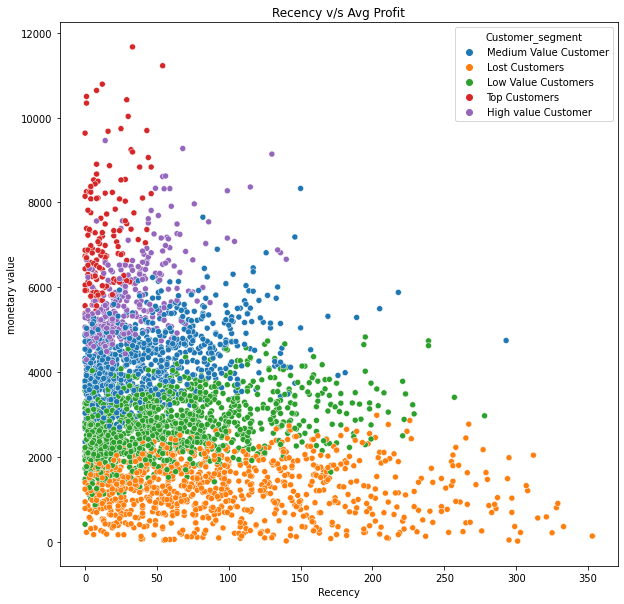

In [155]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=rfmTable,x=rfmTable['recency'],y=rfmTable['monetary_value'],hue="Customer_segment")
plt.title('Recency v/s Avg Profit')
plt.xlabel("Recency")
plt.ylabel('monetary value')
plt.show()

In [158]:
data

,product_class,transaction_id,product_id,customer_id,list_price,standard_cost,profit,profit_%,last_purchase_days_ago
0,high,30530037,120232,5236135,3287856,2171944,1115912,1.814750e+05,548524.0
1,low,29355828,140918,5189023,2748093,1542882,1205211,6.722577e+05,540375.0
2,medium,138024914,646143,24018100,15895665,7285718,8609947,5.498576e+06,2502310.0
3,not known,2099221,0,321663,214809,109532,105277,1.893471e+04,37012.0


In [159]:
data=Transactions.groupby("product_class").sum().reset_index("product_class")
data['profit_%']=(100*data['profit_%'])/data['profit_%'].sum()
data 


,product_class,transaction_id,product_id,customer_id,list_price,standard_cost,profit,profit_%,last_purchase_days_ago
0,high,30530037,120232,5236135,3287856,2171944,1115912,2.848345,548524.0
1,low,29355828,140918,5189023,2748093,1542882,1205211,10.551437,540375.0
2,medium,138024914,646143,24018100,15895665,7285718,8609947,86.303028,2502310.0
3,not known,2099221,0,321663,214809,109532,105277,0.297190,37012.0


Text(0.5, 1.0, 'product_class v/s profit % ')

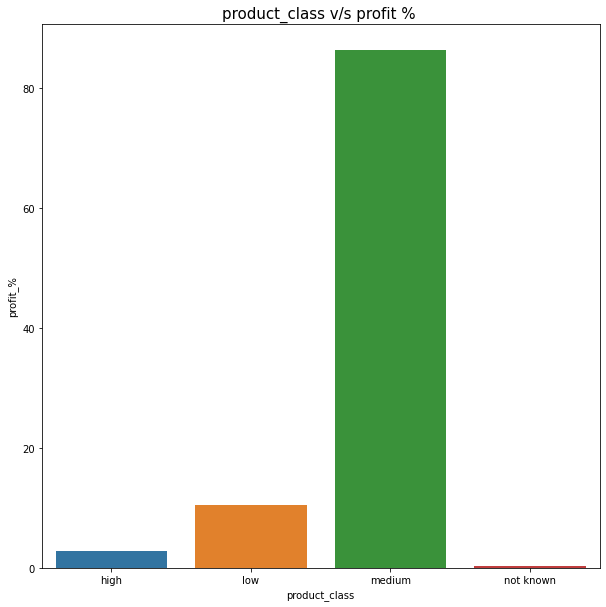

In [161]:
plt.figure(figsize=(10,10))
c=sns.barplot(data=data,x='product_class',y="profit_%")
plt.title("product_class v/s profit % ",fontsize=15)


In [162]:
data=pd.merge(cd,rfmTable,on="customer_id",how="inner")

In [163]:
(data['Customer_segment']=="Top Customers").value_counts()

False    3273
True      141
Name: Customer_segment, dtype: int64

In [164]:
df=data.groupby("Customer_segment")["job_industry_category"].value_counts()
df1=pd.DataFrame(df)
df2=df1.iloc[40:]
df2.rename(columns={'job_industry_category':"count"},inplace=True)
df2.reset_index("job_industry_category",inplace=True)
df2

C:\Users\DELL\AppData\Local\Temp\ipykernel_7576\3174393222.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.rename(columns={'job_industry_category':"count"},inplace=True)


,job_industry_category,count
Customer_segment,,
Top Customers,Health,33
Top Customers,Manufacturing,26
Top Customers,Financial Services,24
Top Customers,not_known,23
Top Customers,Retail,14
Top Customers,Property,8
Top Customers,Argiculture,4
Top Customers,IT,4
Top Customers,Entertainment,3


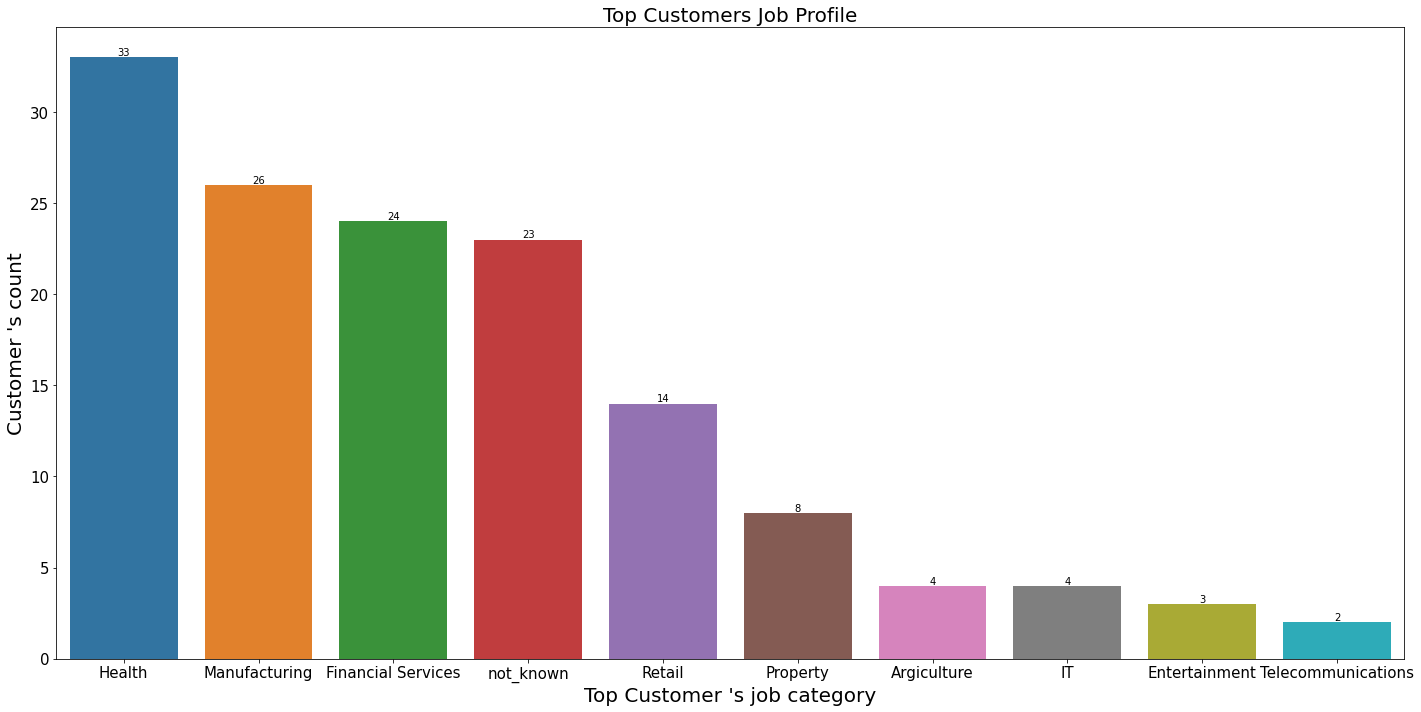

In [165]:
plt.figure(figsize=(20,10))
d=sns.barplot(data=df2,x="job_industry_category",y="count")
plt.xlabel("Top Customer 's job category",fontsize=20)
for i in d.containers:
 d.bar_label(i,)
plt.ylabel("Customer 's count",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Top Customers Job Profile",fontsize=20)
plt.tight_layout()


In [166]:
df3=df1.iloc[10:20]
df3.rename(columns={'job_industry_category':"count"},inplace=True)
df3.reset_index("job_industry_category",inplace=True)
df3


C:\Users\DELL\AppData\Local\Temp\ipykernel_7576\32070801.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns={'job_industry_category':"count"},inplace=True)


,job_industry_category,count
Customer_segment,,
Lost Customers,Financial Services,204
Lost Customers,Manufacturing,178
Lost Customers,not_known,141
Lost Customers,Health,139
Lost Customers,Retail,83
Lost Customers,Property,66
Lost Customers,IT,39
Lost Customers,Entertainment,36
Lost Customers,Argiculture,19


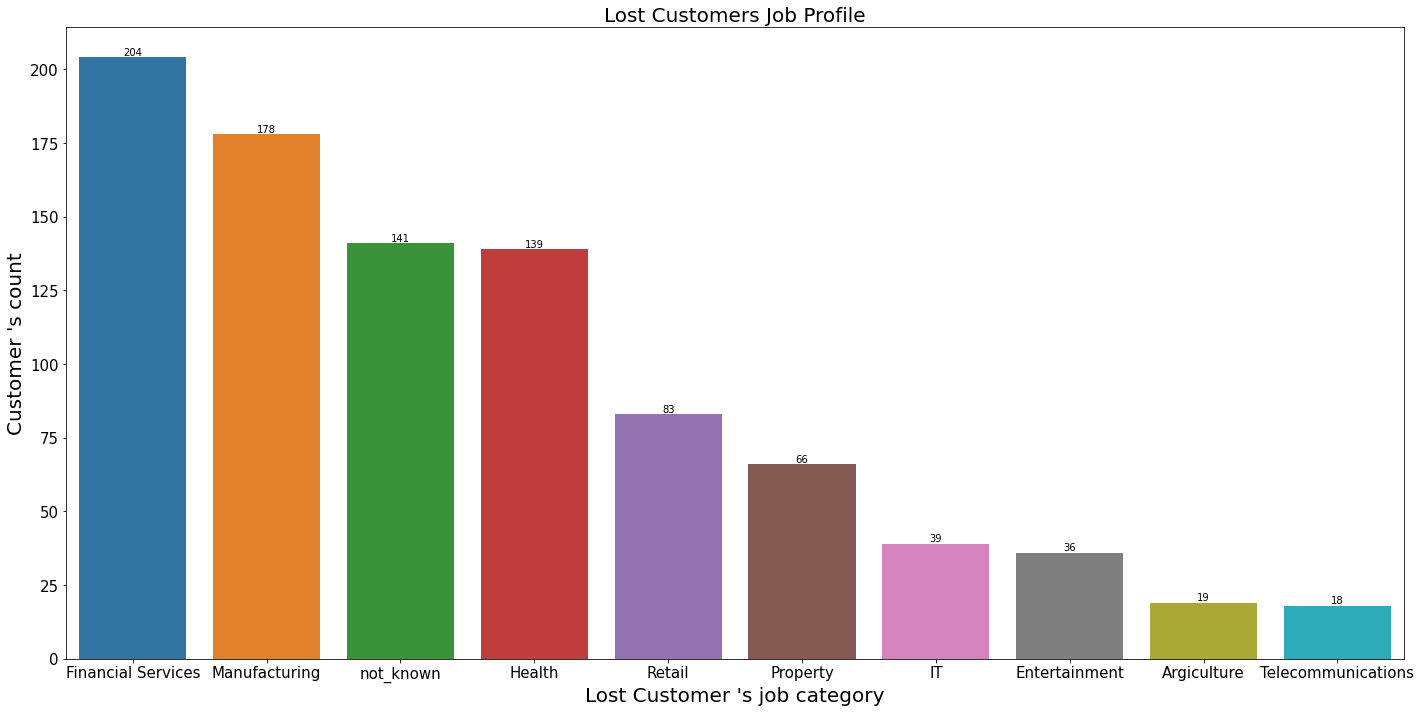

In [167]:
plt.figure(figsize=(20,10))
d=sns.barplot(data=df3,x="job_industry_category",y="count")
plt.xlabel("Lost Customer 's job category",fontsize=20)
for i in d.containers:
 d.bar_label(i,)
plt.ylabel("Customer 's count",fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Lost Customers Job Profile",fontsize=20)
plt.tight_layout()

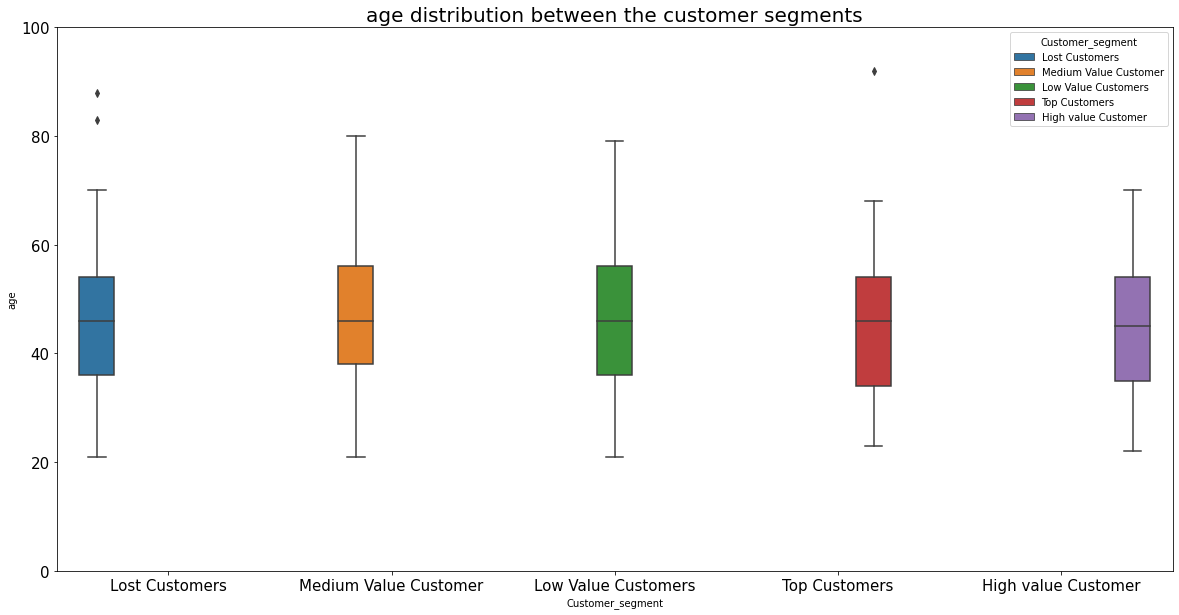

In [168]:
plt.figure(figsize=(20,10))
sns.boxplot(data=data,x="Customer_segment",y="age",hue="Customer_segment")
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim(0,100)
plt.title("age distribution between the customer segments",fontsize=20)
plt.show()

In [169]:
!pip install openpyxl

In [170]:
Transactions.to_excel("Transactions.xlsx")
ncl.to_excel("Ncl.xlsx")

In [171]:
cd.to_excel("cd.xlsx")

In [172]:
ca.to_excel("ca.xlsx")

In [178]:
rfmTable.to_excel('rfm.xlsx')

In [181]:

from IPython.display import display, HTML
html_code = """
<div class='tableauPlaceholder' id='viz1684846726063' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;RF&#47;RFMAnalysis_16277968095940&#47;RFMAnalysis&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='RFMAnalysis_16277968095940&#47;RFMAnalysis' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;RF&#47;RFMAnalysis_16277968095940&#47;RFMAnalysis&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='filter' value='publish=yes' /></object></div>                
"""
display(HTML(html_code))